In [73]:
# Import libraries

import shap
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
shap.initjs()

In [47]:
# Load Diabetes dataset

X, y = shap.datasets.diabetes()

In [59]:
# Shape

X.shape, y.shape

((442, 10), (442,))

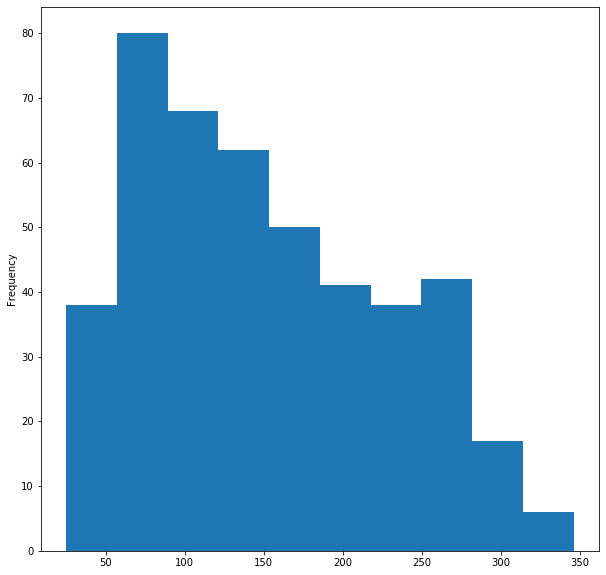

In [88]:
# Distribution of target variable

plt.figure(figsize=(10,10))
pd.Series(y).plot('hist')

In [62]:
# Train using XGBoost Regressor model

XGB_model = xgboost.XGBRegressor()
XGB_model.fit(X, y)

[16:26:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [63]:
# Create Tree explainer

explainer = shap.TreeExplainer(XGB_model)

In [64]:
# Extract SHAP values to explain the model predictions

shap_values = explainer.shap_values(X)

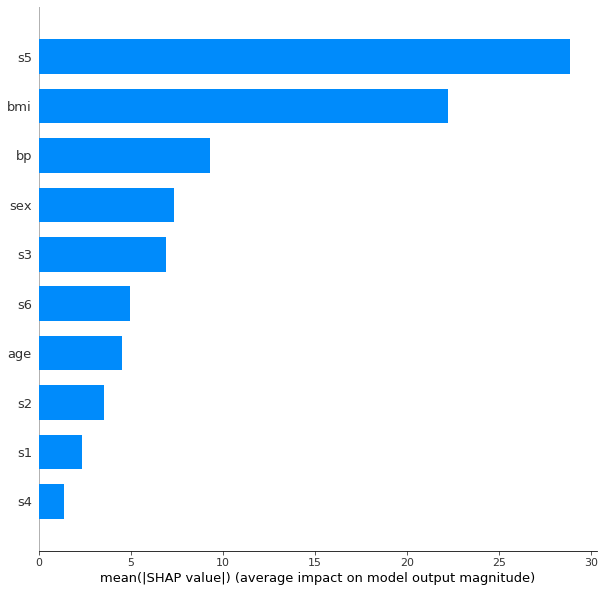

In [86]:
# Plot Feature Importance

plt.figure(figsize=(10,10))
shap.summary_plot(shap_values, X, plot_type="bar", auto_size_plot=False)

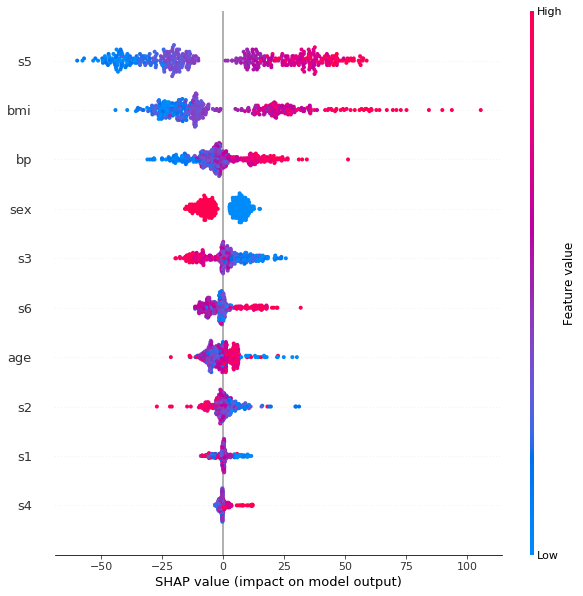

In [87]:
# Plot Feature Importance - 'Dot' type

plt.figure(figsize=(10,10))
shap.summary_plot(shap_values, X, plot_type='dot', auto_size_plot=False)

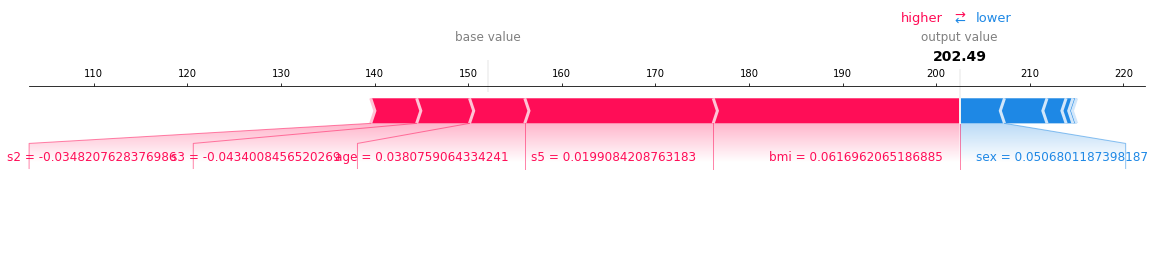

In [80]:
# Visualize the explanation of first prediction

shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :], matplotlib=True)

In [82]:
# Visualize the training set using SHAP predictions

shap.force_plot(explainer.expected_value, shap_values, X)